In [1]:
import torch
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
import json

data_dir = "data/polyvore/"
with open(f"{data_dir}train_no_dup.json", "r", encoding="utf-8") as f:
    outfits = json.load(f)

In [3]:
outfits[0]

{'name': 'Casual',
 'views': 8743,
 'items': [{'index': 1,
   'name': 'mock neck embroidery suede sweatshirt',
   'price': 24.0,
   'likes': 10,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194508109',
   'categoryid': 4495},
  {'index': 2,
   'name': 'luxe double zip hooded jacket',
   'price': 150.0,
   'likes': 2250,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188778349',
   'categoryid': 25},
  {'index': 3,
   'name': 'citizens humanity high rise rocket hem jean',
   'price': 248.0,
   'likes': 2437,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188977857',
   'categoryid': 27},
  {'index': 4,
   'name': 'suede tie short boots',
   'price': 37.0,
   'likes': 2,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194942557',
   'categoryid': 261},
  {'index': 5,
   'name': 'cloth travel school backpack',
   'price': 22.0,
   'likes': 2,
   'image': 'http://img2.polyvoreim

In [4]:
import os
out_dir = "data/Re-PolyVore/all_together/"
# in_dirs = os.listdir("data/Re-PolyVore")

# for dir in tqdm(in_dirs):
#     if dir != "all_together":
#         files = os.listdir(f"data/Re-PolyVore/{dir}")
#         for file in tqdm(files, leave=False):
#             if ".jpg" in file:
#                 img = Image.open(f"data/Re-PolyVore/{dir}/{file}")
#                 img.save(f"{out_dir}{file}")

In [5]:
outfits_dict = {}
for i in range(len(outfits)):
    outfits_dict.update({outfits[i]["set_id"]: {"ind": i}})


for item in tqdm(os.listdir(out_dir)):
    try:
        outfit, suff = item.split("_", 1)
        num = int(suff.split(".")[0])
        if outfits_dict.get(outfit) is not None:
            item_dict = outfits[outfits_dict[outfit]["ind"]]["items"][num-1]
            if outfits_dict[outfit].get("items") is None:
                outfits_dict[outfit].update({"items": [item_dict | {"path": out_dir+item}]})
            else:
                outfits_dict[outfit]["items"].append(item_dict | {"path": out_dir+item})
    except: continue

  0%|          | 0/126928 [00:00<?, ?it/s]

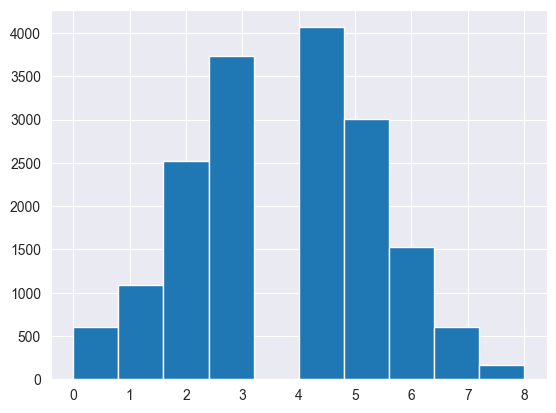

In [6]:
o_len = []
for _, O in outfits_dict.items():
    if O.get("items") is not None:
        o_len.append(len(O["items"]))
    else:
        o_len.append(0)

plt.hist(o_len)
plt.show()

In [7]:
# image = Image.open("data/Re-PolyVore/all_together/100167523_10.jpg")
# image.show()

In [8]:
# with open("data/Re-PolyVore_encoded_with_FashionClip.json", "w", encoding="utf-8") as f:
#     json.dump(outfits_dict, f, indent=4)

In [9]:
# import yaml 
# with open("data/Re-PolyVore_encoded_with_FashionClip.json", "r", encoding="utf-8") as f:
#     test_dict = yaml.safe_load(f)

In [10]:
from fashion_clip.fashion_clip import FashionCLIP
model = FashionCLIP('fashion-clip')

In [11]:
with open("data/Re-PolyVore_encoded_with_FashionClip.json", "r", encoding="utf-8") as f:
    outfits_dict = json.load(f)

In [ ]:
with torch.no_grad(): 
    
    # with open("data/Re-PolyVore_encoded_with_FashionClip.json", "r", encoding="utf-8") as f:
    #     outfits_dict = json.load(f)
        
    for ind, (id, outfit) in enumerate(tqdm(outfits_dict.items())):
        if outfit.get("processed") is None:
            if outfit.get("items") is not None:
                img_paths = [item["path"] for item in outfit["items"]]
                texts = [item['name'] for item in outfit["items"]]
                batch_size = len(outfit["items"])
                img_features = [i.tolist() for i in model.encode_images(img_paths, batch_size=batch_size)]
                text_features = [t.tolist() for t in model.encode_text(texts, batch_size=batch_size)]
                for item, i, t in zip(outfit["items"], img_features, text_features):
                    # item["image_features"] = model.encode_images([item["path"]], batch_size=1)[0]
                    # item["text_features"] = model.encode_text([item["image"]], batch_size=1)[0]
                    item["image_features"] = i
                    item["text_features"] = t
                outfit["processed"] = "True"
        if (ind + 1) % 300 == 0:  
            with open("data/Re-PolyVore_encoded_with_FashionClip.json", "w", encoding="utf-8") as f:
                json.dump(outfits_dict, f, indent=4)
                
    json.dump(outfits_dict, f, indent=4)

  0%|          | 0/17316 [00:00<?, ?it/s]